In [7]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s, A, i, j, k, z, w = smp.symbols('x y t n a b C c r u s A i j k z w')
f, g, m = smp.symbols('f g m', cls=smp.Function)

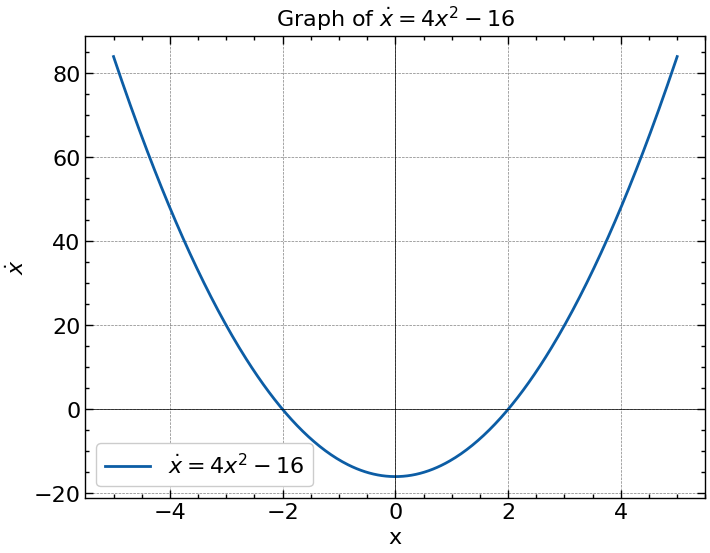

In [3]:
# Define the function
def f(x):
    return 4*x**2 - 16

# Generate x values
x = np.linspace(-5, 5, 400)

# Compute y values
y = f(x)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\dot{x} = 4x^2 - 16$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title(r'Graph of $\dot{x} = 4x^2 - 16$')
plt.xlabel('x')
plt.ylabel(r'$\dot{x}$')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Define the variable and the function
x = smp.symbols('x')
f = 4*x**2 - 16

# Solve for the fixed points
fixed_points = smp.solve(f, x)

fixed_points

[-2, 2]

In [5]:
# Define the variable and the function
x = smp.symbols('x')
f = 4*x**2 - 16

# Compute the derivative
f_prime = smp.diff(f, x)

f_prime

8*x

In [12]:
t = smp.symbols('t')
x = smp.Function('x')(t)
f = 4*x**2 - 16
diff_eq = smp.Eq(smp.Derivative(x, t), f)
solution = smp.dsolve(diff_eq)
solution

Eq(x(t), 2/tanh(C1 - 8*t))

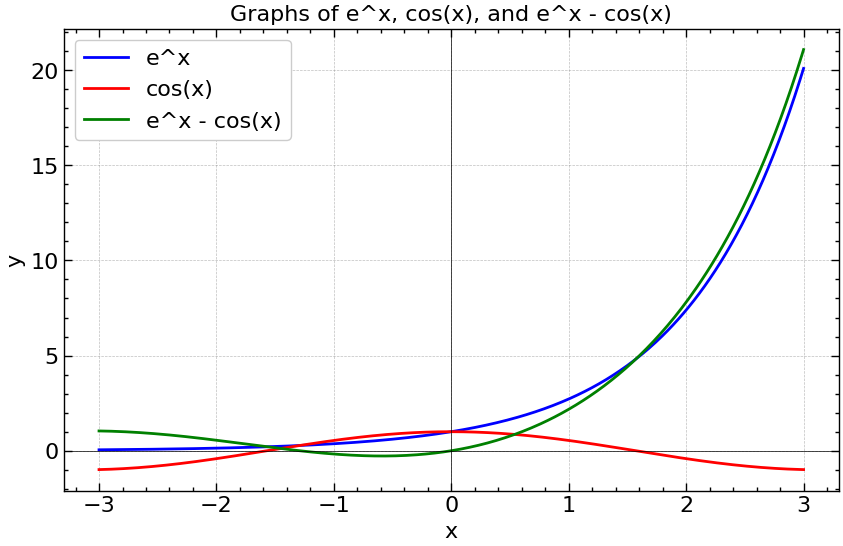

In [13]:
# Define the range for x values
x = np.linspace(-3, 3, 400)

# Compute the functions
y_exp = np.exp(x)
y_cos = np.cos(x)
y_diff = y_exp - y_cos

# Plot the functions
plt.figure(figsize=(10,6))
plt.plot(x, y_exp, label='e^x', color='blue')
plt.plot(x, y_cos, label='cos(x)', color='red')
plt.plot(x, y_diff, label='e^x - cos(x)', color='green')

# Add labels, title, legend, and grid
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphs of e^x, cos(x), and e^x - cos(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Display the plot
plt.show()

In [15]:
# Define the symbols
N, r, K, t, C = smp.symbols('N r K t C')

# Define the differential equation
diff_eq = smp.Eq(smp.Derivative(N, t), r * N * (1 - N/K))

# Separate variables
separated_expr = smp.simplify(1/(N * (1 - N/K)))
lhs_integral = smp.integrate(separated_expr, N)
rhs_integral = r * t

# Combine the integrals and add the integration constant
solution = smp.Eq(lhs_integral, rhs_integral + C)

solution

Eq(log(N) - log(-K + N), C + r*t)

In [18]:
# Define the symbols
t, r, K, C = smp.symbols('t r K C')
x = smp.Function('x')(t)  # Define x as a function of t

# Express the differential equation in terms of x using the relation x = 1/N
diff_eq_x = smp.Eq(smp.Derivative(x, t), -r * (1 - K*x))

# Solve the differential equation for x(t)
solution_x = smp.dsolve(diff_eq_x)

solution_x

Eq(x(t), C1*exp(K*r*t) + 1/K)

In [24]:
# Define the symbols
x, c, T = smp.symbols('x c T')

# Define the integrand for the left side
integrand = 1/x**c

# Compute the integral from x=1 to x=0
integral_result = smp.integrate(integrand, (x, 1, 0))

# The integral on the right side is simply -T
T_solution = -integral_result

print(T_solution)

-Piecewise((0**(1 - c)/(1 - c) - 1/(1 - c), (c > -oo) & (c < oo) & Ne(c, 1)), (-oo, True))


In [28]:
# Define the symbols
x, t, C = smp.symbols('x t C')

# Separate variables and integrate
integral_x = smp.integrate(1/(1 + x**2), x)
integral_t = smp.integrate(1, t)

# The general solution will be integral_x = integral_t + C
solution = smp.Eq(integral_x, integral_t + C)

solution

Eq(atan(x), C + t)

In [31]:
# Define the symbols
x, t, t_0 = smp.symbols('x t t_0')

# Separate variables and integrate
integral_x = smp.integrate(1/x**(1/3), (x, 0, x))
integral_t = smp.integrate(1, (t, t_0, t))

# The general solution will be integral_x = integral_t
solution = smp.Eq(integral_x, integral_t)

solution

Eq(1.5*x**0.666666666666667, t - t_0)

In [34]:
# Define the symbol
x = smp.symbols('x')

# Define the differential equation
x_dot = x * (1 - x)

# Integrate to find the potential function V(x)
V = -smp.integrate(x_dot, x)

V

x**3/3 - x**2/2

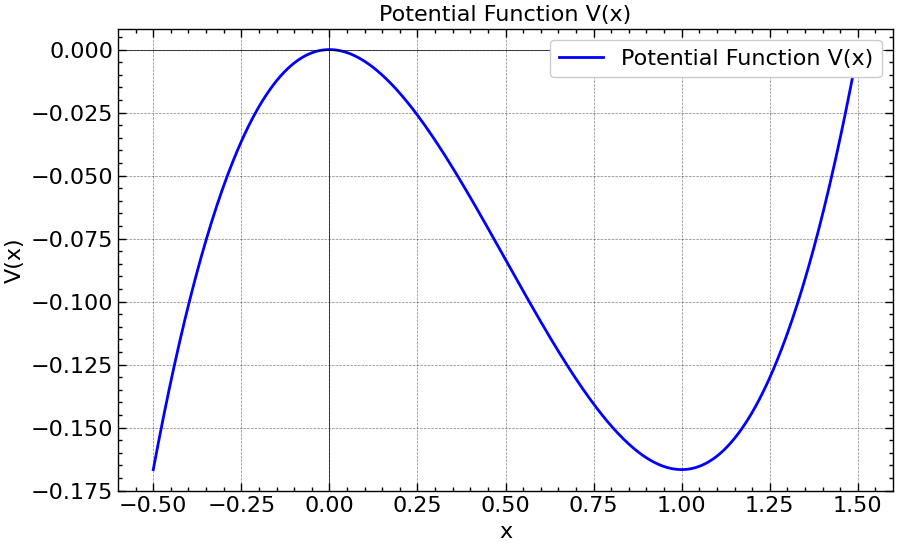

In [35]:
# Define the potential function V(x)
def V(x):
    return (x**3)/3 - (x**2)/2

# Generate x values
x_values = np.linspace(-0.5, 1.5, 400)
V_values = V(x_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, V_values, label='Potential Function V(x)', color='blue')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Potential Function V(x)')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Define the symbols
x, r = smp.symbols('x r')

# Define the differential equation
x_dot = r + x - x**3

# Integrate to find the potential function V(x)
V = -smp.integrate(x_dot, x)

V

-r*x + x**4/4 - x**2/2

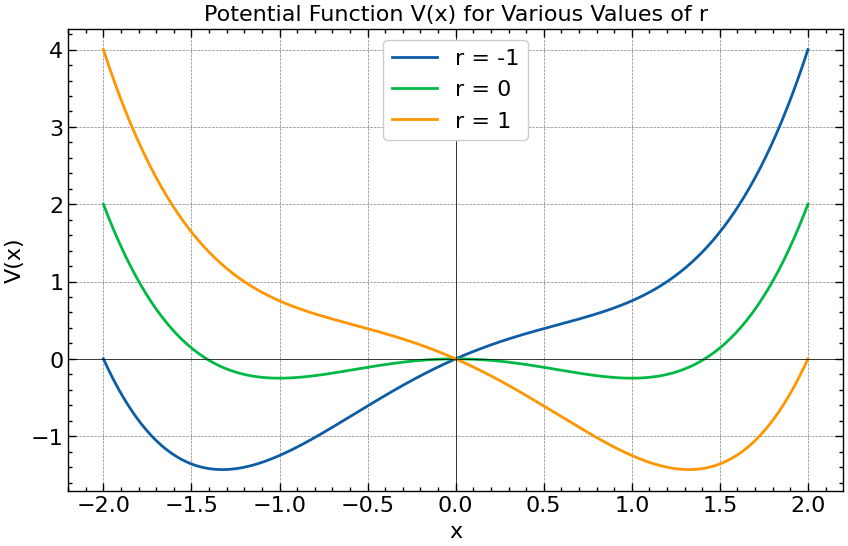

In [42]:
# Define the symbols
x, r = smp.symbols('x r')

# Define the differential equation
x_dot = r + x - x**3

# Integrate to find the potential function V(x)
V = -smp.integrate(x_dot, x)

# Convert V(x) to a Python function for plotting
V_func = smp.lambdify((x, r), V, "numpy")

# Generate x values
x_values = np.linspace(-2, 2, 400)

# Plotting for various values of r
plt.figure(figsize=(10, 6))
for r_val in [-1, 0, 1]:
    V_values = V_func(x_values, r_val)
    plt.plot(x_values, V_values, label=f'r = {r_val}')

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Potential Function V(x) for Various Values of r')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Explicitly use sympy's diff function to compute the second derivative of V(x)
V_double_prime = smp.diff(V, x, 2)

# Evaluate the second derivative of V at x = 0 for each value of r
r_values = [-1, 0, 1]
stability_at_zero = {}

for r_val in r_values:
    curvature_at_zero = V_double_prime.subs({x: 0, r: r_val})
    
    if curvature_at_zero > 0:
        stability_at_zero[r_val] = "Stable (attracting)"
    elif curvature_at_zero < 0:
        stability_at_zero[r_val] = "Unstable (repelling)"
    else:
        stability_at_zero[r_val] = "Semi-stable"

stability_at_zero

{-1: 'Unstable (repelling)',
 0: 'Unstable (repelling)',
 1: 'Unstable (repelling)'}